# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Predicting The Onset of Diabetes Based on Diagnostic Measures

## Stage 0 — Data Preparation

In the code cell below, we import the necessary libraries and import **Pima Indians Diabetes Database** dataset to the Jupyter notebook as DataFrame.

In [28]:
%matplotlib inline
import pandas as pd
print("The version of pandas: {}".format(pd.__version__))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('datasets/diabetes.csv')

The version of pandas: 0.20.3


## Stage 1 — Data Exploration
Print the headers of the dataset, find the dimension of the dataset, identity how many persons are diabetic or not, and finally, use `'head()'` function in pandas to take a look at the first five rows in the dataset.

The dimensions of Pima Indians Diabetes Database dataset: (768, 9)
Outcome
0    500
1    268
dtype: int64


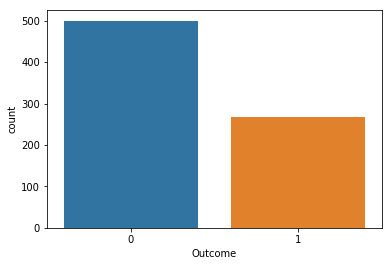

In [29]:
print("The dimensions of Pima Indians Diabetes Database dataset: {}".format(diabetes.shape))
print(diabetes.groupby('Outcome').size())
sns.countplot(diabetes['Outcome'],label="Count")

In [30]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Visualization 

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

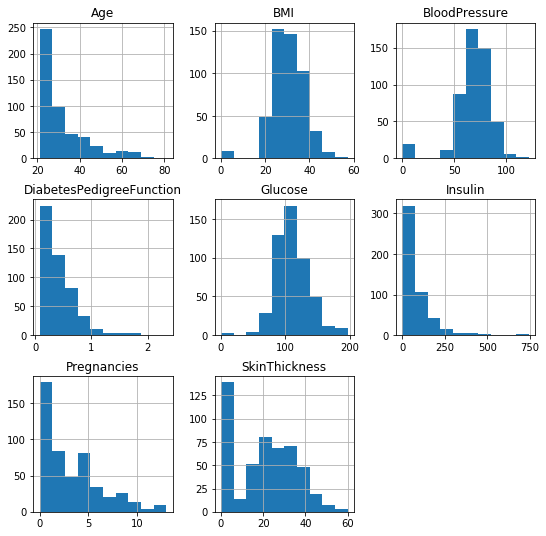

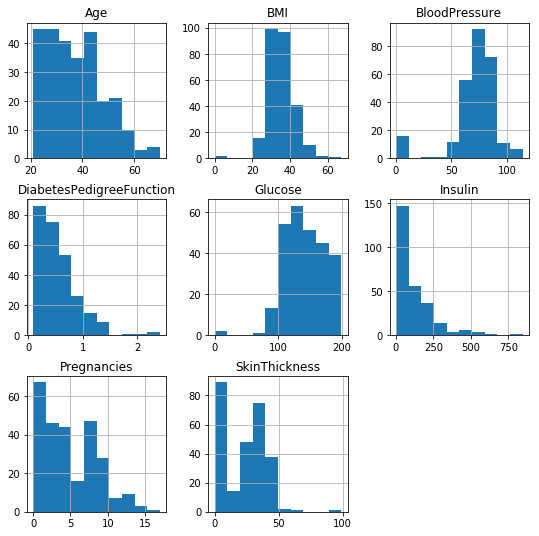

In [31]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

## Stage 2 — Data Cleaning
In this stage, we further investigate the dataset to see whether there are:
- Missing or null data points.
- Unexpected outliers.

### Missing or Null Data points

In [32]:
print(diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Unexpected Outliers

In [33]:
print("There are total {} zero values for blood pressure".format(diabetes[diabetes.BloodPressure == 0].shape[0]))
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for glucose level".format(diabetes[diabetes.Glucose == 0].shape[0]))
print(diabetes[diabetes.Glucose == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for skin fold thickness".format(diabetes[diabetes.SkinThickness == 0].shape[0]))
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for skin fold thickness".format(diabetes[diabetes.SkinThickness == 0].shape[0]))
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for BMI".format(diabetes[diabetes.BMI == 0].shape[0]))
print(diabetes[diabetes.BMI  == 0].groupby('Outcome').size())
print("")
print("There are total {} zero values for insulin ".format(diabetes[diabetes.Insulin  == 0].shape[0]))
print(diabetes[diabetes.Insulin == 0].groupby('Outcome').size())

There are total 35 zero values for blood pressure
Outcome
0    19
1    16
dtype: int64

There are total 5 zero values for glucose level
Outcome
0    3
1    2
dtype: int64

There are total 227 zero values for skin fold thickness
Outcome
0    139
1     88
dtype: int64

There are total 227 zero values for skin fold thickness
Outcome
0    139
1     88
dtype: int64

There are total 11 zero values for BMI
Outcome
0    9
1    2
dtype: int64

There are total 374 zero values for insulin 
Outcome
0    236
1    138
dtype: int64


 Based on the previous results, we remove the rows which the **BloodPressure**, **BMI** and **Glucose** are zero.

In [34]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print("The dimensions of cleaned Pima Indians Diabetes Database dataset is {}".format(diabetes_mod.shape))

The dimensions of cleaned Pima Indians Diabetes Database dataset is (724, 9)


## Stage 3 — Feature Engineering
After data cleaning, we check again the basic statistics of our modified dataset.

In [35]:
diabetes_mod.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that all features contain numeric data, however, the scale of each feature is inconsistent and we may need to apply some _feature scaling_ to enure that out learning model can handle this data correctly.

In [36]:
# We will use all the features available to the X variable and the outcome to the y variable
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names].values
y = diabetes_mod.Outcome.values


# Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transform = sc.fit_transform(X)

# Check the mean and standard deviation of X
mean = np.mean(X_transform, axis=0)
print('Mean of features: {}'.format(np.round(mean)))
standard_deviation = np.std(X_transform, axis=0)
print('Standard deviation of features: {}'.format(np.round(standard_deviation)))

Mean of features: [-0. -0. -0. -0.  0. -0. -0.  0.]
Standard deviation of features: [ 1.  1.  1.  1.  1.  1.  1.  1.]


## Stage 4— Model Selection
Establishing classifiers by several machine learning algorithms: **K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boost**, and then choose the model that performs best for the data set at hand.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))

### Split Data Into Training/Validation/Testing Set

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform,
                                                    y, stratify = diabetes_mod.Outcome, 
                                                    test_size = 0.2,
                                                    random_state=42)
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 579 samples.
Testing set has 145 samples.


In [39]:
from sklearn.metrics import matthews_corrcoef

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = matthews_corrcoef(y_true, y_predict)
    
    # Return the score
    return score

In [40]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

names = []
scores = []
scoring_fnc = make_scorer(performance_metric)

for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=42) 
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_fnc).mean()
    
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

   Name     Score
0   KNN  0.374800
1   SVC  0.447349
2    LR  0.520909
3    DT  0.329882
4   GNB  0.485549
5    RF  0.427495
6    GB  0.476026
7   XGB  0.485295
8  LGBM  0.390902


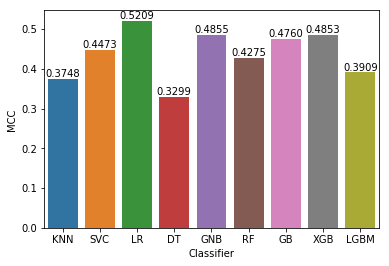

In [41]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='MCC')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()